<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [4]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

C:\Users\lilyx\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [149]:
import pandas as pd

df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [150]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [151]:
def tokenize(text):
    return [token for token in simple_preprocess(text)]



df['tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))

id2word = corpora.Dictionary(df['tokens'])

In [108]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)#just like max_df
#word has to appear in at least 10 documents to be included. 
#75% of documents have the word in it

len(id2word.keys())#number of documents after filtering extremes

2626

In [111]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in df['tokens']]
#loop through everything in doc_stream, we are working with vector representations

#we don't input documents as raw text, they are dictionaries of words and their document, topics
#documents are vector representations similar to count vectorizer
#loop over everything in docstring tranform as as bag of words, stored in variable as "corpus"

In [112]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,#for reproducability not very stable, different results
                   num_topics = 15,
                   passes=10,
                   workers=4#multi-core
                  )

lda.print_topics()#topics are list of tuples, id of topic, and probability * word

[(0,
  '0.077*"the" + 0.045*"is" + 0.036*"it" + 0.034*"and" + 0.023*"this" + 0.017*"for" + 0.016*"tablet" + 0.016*"to" + 0.015*"but" + 0.013*"fire"'),
 (1,
  '0.046*"will" + 0.040*"the" + 0.029*"with" + 0.029*"again" + 0.026*"buy" + 0.023*"to" + 0.022*"be" + 0.021*"have" + 0.020*"purchase" + 0.017*"am"'),
 (2,
  '0.125*"great" + 0.074*"for" + 0.060*"price" + 0.052*"the" + 0.042*"and" + 0.040*"product" + 0.030*"this" + 0.028*"is" + 0.024*"tablet" + 0.023*"good"'),
 (3,
  '0.064*"it" + 0.055*"for" + 0.047*"my" + 0.043*"and" + 0.031*"this" + 0.030*"she" + 0.025*"loves" + 0.023*"the" + 0.020*"old" + 0.020*"tablet"'),
 (4,
  '0.044*"to" + 0.039*"them" + 0.028*"battery" + 0.026*"up" + 0.021*"for" + 0.021*"life" + 0.020*"as" + 0.019*"and" + 0.017*"in" + 0.017*"had"'),
 (5,
  '0.082*"as" + 0.048*"they" + 0.045*"batteries" + 0.037*"the" + 0.031*"work" + 0.031*"last" + 0.030*"long" + 0.025*"and" + 0.023*"to" + 0.022*"these"'),
 (6,
  '0.094*"so" + 0.054*"far" + 0.048*"the" + 0.036*"can" + 0.035*

In [113]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]#cleaning
topics = [' '.join(t[0:5]) for t in words]
for t in topics:
    print(t)
    print('\n')
#print(topics[0])#typically use the first 3-5 words for visualization purposes

the is it and this


will the with again buy


great for price the and


it for my and this


to them battery up for


as they batteries the work


so far the can for


good for price batteries you


the to it and on


tablet as and well for


batteries the and in these


my and for one it


the to it that and


to and easy use it


it to the for but




In [114]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)
#overall term frequency
#estimated term frequency of particular topic
#good for what the model is trying to express
#ie topic 1 is half frequency of like
#look for extinguishable
#bubbles of same size what percentage of documents hae topic 1
#bubbles that don't overlap
#size of bubbles - how many documents have word occurrence
#term frequency how many times word appears
#inner topic distance to diagnose how similar dissimilar topics are, topics overlapping, how good our topic model is

#no selection, represents 30 most salient terms - most import words in corpus
#select 1 - overall term frequency as the glue
#estimated term frequency within selected topic - like appears a bit, salient of like is half of frequency of all occurence
#if sample topic one, 50 samples, I'd expect estimate term frequency is half that of term frequency of like
#slider - at 0, shows words that are most important, 50-50 words that are important to both- shows what topic is trying to express
#overall term frequency is total occurrence word appears

C:\Users\lilyx\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.067597 -0.016211       1        1  13.415141
10     0.126612 -0.120650       2        1  12.303538
3     -0.202713  0.009400       3        1  12.043096
12    -0.014095 -0.122614       4        1   8.408684
8     -0.030494 -0.100655       5        1   8.392755
5      0.226399 -0.006128       6        1   7.687763
13    -0.150946  0.004382       7        1   7.115861
11    -0.084253 -0.078008       8        1   5.589921
14    -0.049859 -0.074231       9        1   5.054068
2     -0.040526  0.249957      10        1   4.937135
1      0.124269 -0.078592      11        1   3.998401
7      0.216699  0.191936      12        1   3.034956
6     -0.006882  0.076172      13        1   2.947485
9     -0.111203  0.126982      14        1   2.779840
4      0.064589 -0.061739      15        1   2.291347, topic_info=     Category          Freq         Term         Total  loglift  logprob
2090  Default   7082.000000       tablet   7082.000000  30.0000  30.0000
64    Default   5959.000000         good   5959.000000  29.0000  29.0000
47    Default   8883.000000        great   8883.000000  28.0000  28.0000
41    Default   7494.000000    batteries   7494.000000  27.0000  27.0000
39    Default   7594.000000           as   7594.000000  26.0000  26.0000
154   Default  19167.000000           it  19167.000000  25.0000  25.0000
23    Default  18016.000000          for  18016.000000  24.0000  24.0000
36    Default   4883.000000        price   4883.000000  23.0000  23.0000
14    Default   4720.000000           so   4720.000000  22.0000  22.0000
18    Default  19640.000000           to  19640.000000  21.0000  21.0000
37    Default   5964.000000         they   5964.000000  20.0000  20.0000
883   Default   2907.000000         easy   2907.000000  19.0000  19.0000
157   Default  11021.000000           my  11021.000000  18.0000  18.0000
683   Default   2431.000000          she   2431.000000  17.0000  17.0000
96    Default   4759.000000          you   4759.000000  16.0000  16.0000
17    Default   3225.000000         them   3225.000000  15.0000  15.0000
28    Default   4516.000000        these   4516.000000  14.0000  14.0000
1748  Default   2043.000000        loves   2043.000000  13.0000  13.0000
1884  Default   2930.000000       kindle   2930.000000  12.0000  12.0000
302   Default   2687.000000         kids   2687.000000  11.0000  11.0000
73    Default   2022.000000         will   2022.000000  10.0000  10.0000
38    Default   2487.000000         well   2487.000000   9.0000   9.0000
163   Default   4482.000000          use   4482.000000   8.0000   8.0000
0     Default  22162.000000          and  22162.000000   7.0000   7.0000
119   Default   3933.000000          can   3933.000000   6.0000   6.0000
305   Default   1189.000000          far   1189.000000   5.0000   5.0000
240   Default  10456.000000         this  10456.000000   4.0000   4.0000
49    Default   2461.000000         long   2461.000000   3.0000   3.0000
84    Default   2296.000000         last   2296.000000   2.0000   2.0000
16    Default  28647.000000          the  28647.000000   1.0000   1.0000
...       ...           ...          ...           ...      ...      ...
2077  Topic15     84.264938         slow    285.010376   2.5575  -5.2067
75    Topic15    259.799255          had   2157.586670   1.6592  -4.0807
625   Topic15     94.418045     controls    381.970581   2.3784  -5.0929
2374  Topic15     49.123547  entertained    128.720779   2.8127  -5.7463
805   Topic15    141.334274          set    856.502686   1.9743  -4.6895
2493  Topic15     97.178299     parental    446.481812   2.2512  -5.0641
18    Topic15    677.347839           to  19640.742188   0.4089  -3.1224
39    Topic15    313.010986           as   7594.400391   0.5871  -3.8944
1346  Topic15     87.893120     children    484.958466   2.0681  -5.1645
250   Topic15    183.465775          all   267

In [115]:
lda[corpus[0]]#first chapter
#we've been working with topics themselves, but we want to score topic distribution
#document topic distribution - [] whatever document we want - 0 - first document

[(6, 0.113329135), (8, 0.20455974), (10, 0.6513418)]

In [116]:
distro = [lda[d] for d in corpus]
distro[0]

[(6, 0.11342972), (8, 0.20432574), (10, 0.6514752)]

In [148]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

#transforms distro into a complete distribution

d_dist = {k:0 for k in range(0,15)}

dv = pd.DataFrame.from_records(new_distro)
dv.columns = topics
#df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

dv.head()
#preprocessing isn't sufficient enough for good result. the result of analysis shows different characters they write about
#we can extract names, create a list of names - label names male and female to see other themes

,the is it and this,will the with again buy,great for price the and,it for my and this,to them battery up for,as they batteries the work,so far the can for,good for price batteries you,the to it and on,tablet as and well for,batteries the and in these,my and for one it,the to it that and,to and easy use it,it to the for but
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.11343,0.000000,0.204326,0.0,0.651475,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.332220,0.00000,0.000000,0.000000,0.0,0.605876,0.0,0.0,0.0,0.0
2,0.0,0.272911,0.000000,0.0,0.0,0.654867,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.933333,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.189827,0.0,0.0,0.000000,0.00000,0.731385,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [140]:
id2word

In [152]:
from gensim.models.coherencemodel import CoherenceModel#selects proper number of topics as metric like skre or elbow plot, most coherent model possible, 
#model invented in 2003 lda model

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models 
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = df['tokens']
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')#pass in our lda model, as text, dictionary, pass in type of coherence value
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.

In [153]:
# df['tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))

# id2word = corpora.Dictionary(df['tokens'])

In [154]:
import warnings
warnings.filterwarnings('ignore')
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)



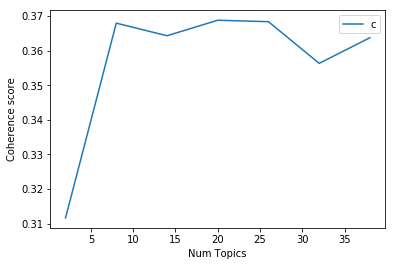

In [156]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#we're looking for the highest coherence value, we want to see the highest point possible before it dips down. 
#looking for closer to 1, individual observations possible. 
#highest coherence possible, lowest number of topics

#distinct categories that don't overlap
#words inside categories to go together in a particular way

In [157]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    #these topics have the highest coherence values
    #coherence is quality topic model
    # we can highest quality when the number of topics is at 8 
    #coherence - how distinct are topics from one another, how well the words within a topic belong together
    #way of expressing topics are distinct

Num Topics = 2  has Coherence Value of 0.3117
Num Topics = 8  has Coherence Value of 0.3679
Num Topics = 14  has Coherence Value of 0.3643
Num Topics = 20  has Coherence Value of 0.3687
Num Topics = 26  has Coherence Value of 0.3683
Num Topics = 32  has Coherence Value of 0.3563
Num Topics = 38  has Coherence Value of 0.3637


In [158]:
import spacy

nlp = spacy.load('en_core_web_md')

In [163]:
doc = nlp(df['reviews.text'][0])

for token in doc:
    print(token.text, token.lemma_, token.pos_)#to get named entities out of spacey, tagging on sentence, so we get proper noun
    #parse speech tagging
    #named entity is gets from speech tagging
    # we query from ent.text
    
#refit lda model with those specific topics

I -PRON- PRON
order order VERB
3 3 NUM
of of ADP
them -PRON- PRON
and and CCONJ
one one NUM
of of ADP
the the DET
item item NOUN
is be VERB
bad bad ADJ
quality quality NOUN
. . PUNCT
Is be VERB
missing miss VERB
backup backup ADJ
spring spring NOUN
so so ADP
I -PRON- PRON
have have VERB
to to PART
put put VERB
a a DET
pcs pcs NOUN
of of ADP
aluminum aluminum NOUN
to to PART
make make VERB
the the DET
battery battery NOUN
work work NOUN
. . PUNCT


In [164]:
for ent in doc.ents:
    print(ent.text, ent.label_)
    
#sometimes you do what to excluded proper nouns but you need to figure out how often the nounds are mentioned

3 CARDINAL


In [165]:
#I want to inspect people from the data

def doc_stream(path):#for reference
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):#empty list iterate items in doctring, return named entities, we get a list of people
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.text)
                
    return set(ppl)
#entity recognition has a neural network behind it

In [168]:
people = get_people(df['reviews.text'])

In [169]:
people = pd.Series(list(people))
people.shape#1800 names

(292,)

In [170]:
people.head(50)

0     this Tap, Google Home
1              Marc Correra
2              Taylor Swift
3                     Gbyte
4                      Ipod
5                    Barbie
6                      Dots
7                  Netflixs
8                       PW2
9                     Price
10             Mickey Mouse
11                   George
12                  Kindles
13                EverReady
14                      Dan
15             Plus YouTube
16                  Hotmail
17           Kindle e-Books
18                     Ikea
19             Daniel Mauro
20                   just.a
21         Kathleen Stroyek
22                 Godchild
23                    Havnt
24             David Eggers
25               Amazon TAP
26     WhyWouldAmazonBother
27                    Triby
28          Kindle Keyboard
29     The Berenstain Bears
30        the Nabi Dreamtab
31                    Theon
32                   Easter
33                   11year
34                    NiMHs
35                  

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling